# Clustering:  DBSCAN

**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise

<br>
<br> 

![](https://i.stack.imgur.com/5aikc.png)

---

### Learning Objectives
- What is DBSCAN?
- How does DBSCAN work?
- How does DBSCAN compare to K-Means and Hierarchical Clustering?
- Implementation
- Code Example

## DBSCAN: Density-based Spatial Clustering of Applications with Noise
- Clusters of high density are separated by clusters of low density

DBSCAN is a widely used and applicable clustering algorithm - given that it takes minimum predefined input and can discover clusters of any shape, not just the gausian-like clusters that K-Means tends to converge on. This way, we can discover difficult to distinguish patterns and glean more useful insights.

> No single clustering algorithm is the best for all the purposes. This means, that there are situations where DBSCAN does a good job at finding clusters, while sometimes it's very bad.  This is all dependant on our data!


#### DBSCAN is a density based clustering algorithm, meaning that the algorithm finds clusters by seeking areas of the dataset that have a higher density of points than the rest of the dataset.

_Unlike other clustering methods, DBSCAN may not assign points to any cluster at all if the conditions we paramatize DBSCAN on don't match the characteristics of our data!_

## How DBSCAN Works

## $\epsilon$: epsilon & minimum number of points

When we use **DBSCAN**, it requires two input parameters - **epsilon**: $\epsilon$, which defines a distance boundary from a point, and the **minimum number of points** within $\epsilon$ necessary to form a cluster, which we'll call the minimum points.


![](https://snag.gy/0lWkw3.jpg?updated=now)

> - <span style="color: gray;">Gray</span> - $\epsilon$ distance boundary
> - <span style="color: red;">Red</span> - $\epsilon$ distance
> - <span style="color: blue;">Blue</span> - Minimum points within $\epsilon$
> - Black - Core sample

### Step by step

1. Choose an “epsilon” and “min_samples”
1. Pick an arbitrary point (_core sample_), and check if there are at least “min_samples” points within distance “epsilon”
 - If **yes**, add those points to the cluster and check each of the new points
 - If **no**, choose another arbitrary point (_core sample_) to start a new cluster
1. Stop once all points have been checked

## DBSCAN Explained

DBSCAN will take the epsilon and minimum points we provided it and cluster all of the points in a neighborhood, first passing the minimum points requirement and then clustering each of the points within epsilon distance to form the clusters. Once one cluster is formed, the algorithm then moves to a new datapoint, and seeks to find related points to form yet another cluster; this will continue until DBSCAN simply runs out of points!

![](https://snag.gy/i38qNp.jpg)
>_This example is missing points but perhaps draw some underneath the projection to illustrate the example._

### Algorithm visualization:

http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ 

Let’s play with this a bit.

### Independently, select the “Pimpled Smiley” distribution of points. What is an optimal epsilon? What about minimum number of points?

## DBSCAN vs K-Means

- **K-Means** can be thought of as a "general" clustering approach, DBSCAN performs especially well with unevenly distributed, non-gausian clusters.

- The fundamental difference with DBSCAN lies in the fact that it is density based rather than **K-Means**, which calculates clusters based on distance from a central point / geometric mean of points.

- **DBSCAN** can be useful to us when we have a lot of dense data. If we used **K-Means** on this data, the algorithm would effectively give us just one large cluster! However with DBSCAN, we can actually break down this cluster into smaller groups to see their attributes.

![](https://snag.gy/73NXe5.jpg)

**What are the advantages over K-Means?**

## DBSCAN vs Hierarchical (briefly)

> Even though we haven't explicitly used hierachical clustering, we should at least review a few rules of thumb, briefly.

- When choosing epsilon in the minimum points in DBSCAN, a selection of < 2 will result in a linkage cluster - essentially the same result as if you were to perform a **hierarchical clustering**. To diversify the DBSCAN, we therefore must give it a significant amount of points to form a cluster.

- **DBSCAN** is density based, which means that it determines clusters based on the number of points in a specific area, whereas in heirarchical clustering, we only care about the minmum distances of single points between clusters to merge on.

**What are the advantages over hierarchical methods?**

> _As a general rule when choosing the minimum points - you should always aim to have the minimum number of points be greater or equal to the amount of dimensions in your data, plus one. This typically will give the algorithm a good estimation of how to evaluate the clusters. Calculating epsilon is a bit trickier and uses a method called the k-distance, which can help visualize the best epsilon._

## Simple sklearn Example

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from plot_code import plot_dbscan

%matplotlib inline

iris = load_iris()

X, y = iris.data, iris.target

In [2]:
dbscan = DBSCAN(eps=0.6, min_samples=6)

In [3]:
Xp = X[:, [0, 3]]

In [4]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [5]:
core_samples  =  dbscan.core_sample_indices_

In [6]:
core_samples

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  58,  59,  61,  62,  63,  64,  65,  66,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  88,  89,  90,  91,  92,  94,  95,  96,  97,
        99, 101, 102, 103, 104, 107, 110, 111, 112, 113, 115, 116, 120,
       121, 123, 124, 126, 127, 128, 130, 132, 133, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 149])

In [7]:
labels = dbscan.labels_

In [8]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
labels[0]

0

The DBSCAN algorithm in Python returns two items - the **core samples** and the **labels**. The **core samples** are the points which the algorithm initially finds and searches around the neighborhood to form the cluster, and the **labels** are simply the cluster labels.

In [10]:
Xp[:, 1]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

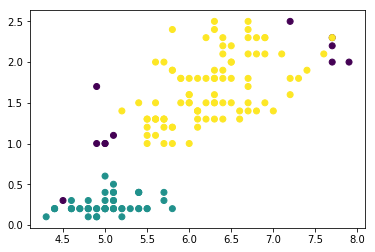

In [11]:
import matplotlib.pyplot as plt

plt.scatter(Xp[:, 0], Xp[:, 1], c=labels)

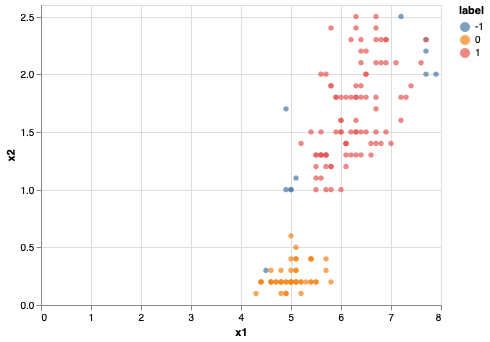

In [12]:
import pandas as pd
import altair as alt 
alt.renderers.enable('notebook')

df = pd.DataFrame({'x1': Xp[:,0], 'x2': Xp[:, 1], 'label': labels})

alt.Chart(df).encode(x='x1', y='x2', color='label:N').mark_circle()

In [13]:
from plot_code import plot_dbscan

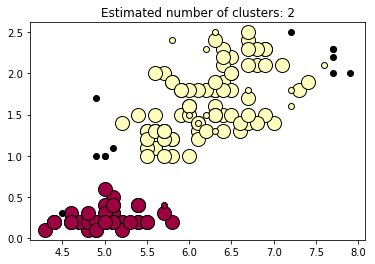

In [14]:
plot_dbscan(dbscan, X, features=[0, 3])

### Conclusion

- DBSCAN will cluster on density based assumptions.
- **Epsilon** and **min_samples**.
- Not every sample is guaranteed to end up in a cluster.
- Compared to K-Means, DBSCAN is better at finding irregularly formed clusters.